# Fully Connected Artificial Neural Networks from scratch

#### This notebook implements neural network model with fully connected layers using only numpy
#### ---------------------------------------------------------------------------------------------------------------

This notebook demonstrates how fully connected neural network can be constructed without libraries such as PyTorch, Keras or Tensorflow which carry out most of the computations under the hood. This implementation is my on and I originally wrote to understand network models better while learning deep learning from various resources. Please note that the this neural network model is not ment to use with large dataset.

## Dependencies

In [1]:
import numpy as np
from matplotlib import pyplot as plt

## Global Variables

In [2]:
run_training=True

## Activation funcitions

Below are most implementations for the most commonly used activation functios:
* Sigmoid
* ReLU
* ( no activation )

In [3]:
def return_max(a):
    a = np.argmax(a, axis=1)
    b = np.zeros((a.size, 3))
    b[np.arange(a.size),a] = 1
    return b

## Fully connected layer

#### Implementation of the fully connected layer used in the model with methods for forward and backward computations 

Each layer has
* Wieght matrix, which includes the bias term if used. Weights will determine the output of the layer.
* Activation function, which will be set no activation by default. Activation is applied after to provide nonlinearity.
* Gradient matrix of the error with respect to weights (initialized to zero matrix)



In [4]:
class layer:
    def __init__(self,input_size,output_size,bias=True,activation=no_activation):
        
        # ---- Activation Function ----  
        self.activation = activation
        
        # ---- Bias ----
        self.bias = bias      
        if bias: input_size+=1
        
        # ---- Weights ----
        self.W = np.random.normal(0,1,(output_size,input_size))
        
        # ---- The gradient of the error with respect to weights ----
        self.dW = np.zeros((output_size,input_size))
    
    def forward(self,x):
        
        # if bias term is used, constant 1 is added to each input to represent bias
        if self.bias == True: x =  np.concatenate((x,np.ones((len(x),1))),axis=-1)
        
        # Input is saved for backward computations
        self.z = x
        
        # (W^T)X
        x = np.dot(x,np.transpose(self.W))
        
        # The activation is applied
        x = self.activation(x)
        
        return x
    
    def backward(self,dy,y):
        d = dy*self.activation(y,derivate=True)
        dz = np.dot(d,self.W)
        self.dW += np.dot(np.transpose(d),self.z)
        if self.bias:
            return dz[:,:-1],self.z[:,:-1]
        return dz,self.z
    
    def update_weights(self,lr):
        self.W -= lr*self.dW
        self.dW = np.zeros(np.shape(self.W))

## Neural Network model with fully connected layers

In [5]:
class NN():
    def __init__(self):
        self.layers=[]
        self.N_layers = 0
    
    def forward(self,x):
        for n in range(self.N_layers):
            x = self.layers[n].forward(x)
        return x
    
    def backward(self,e,y):
        dy=-2*e
        for n in range(self.N_layers):
            dy,y = self.layers[-(n+1)].backward(dy,y)
            
    def update_weights(self,lr):
        for n in range(self.N_layers):
            self.layers[n].update_weights(lr)
        
    def add_layer(self,input_size,output_size,activation=no_activation,bias=True):
        try:
            new_layer = layer(input_size, output_size, activation=activation,bias=bias)
            self.layers.append(new_layer)
            self.N_layers+=1
        except:
            print("FAILURE")

## Test 1 y = x^2


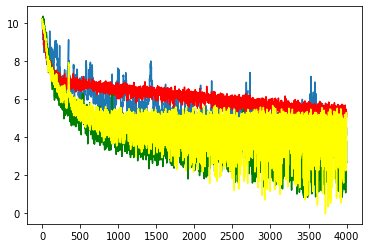

In [7]:
input_size = 8
output_size = 1
hidden_size = 200
    
batch_size = 50
epochs = 4000

#Learning for x**2
learning_rate = 10**-8/100

#Learning for sqrt()
#learning_rate = 2.5*10**-5
#learning_rate = 10**-6

    
Net1 = NN()
Net1.add_layer(input_size, hidden_size,activation=relu)
Net1.add_layer(hidden_size, hidden_size,activation=relu)
Net1.add_layer(hidden_size, output_size, activation=relu)
errors1 = np.zeros(epochs)

Net2 = NN()
Net2.add_layer(input_size, hidden_size,activation=relu)
Net2.add_layer(hidden_size, output_size, activation=relu)
errors2 = np.zeros(epochs)

Net3 = NN()
Net3.add_layer(input_size, hidden_size,activation=relu)
Net3.add_layer(hidden_size, hidden_size,activation=sigmoid)
Net3.add_layer(hidden_size, hidden_size,activation=relu)
Net3.add_layer(hidden_size, output_size, activation=relu)
errors3 = np.zeros(epochs)

Net4 = NN()
Net4.add_layer(input_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, hidden_size,activation=sigmoid)
Net4.add_layer(hidden_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, output_size, activation=relu)
errors4 = np.zeros(epochs)

for i in range(epochs):
    
    # Generate inputs
    x,x_bit,y=prepare_byte_data(batch_size)
    
    # Forward
    y_hat_1 = Net1.forward(x_bit)
    y_hat_2 = Net2.forward(x_bit)
    y_hat_3 = Net3.forward(x_bit)
    y_hat_4 = Net4.forward(x_bit)
    
    #Error
    e1 = (y-y_hat_1)
    e2 = (y-y_hat_2)
    e3 = (y-y_hat_3)
    e4 = (y-y_hat_4)
    
    errors1[i] = np.sqrt(np.sum(e1**2)/batch_size)
    errors2[i] = np.sqrt(np.sum(e2**2)/batch_size)
    errors3[i] = np.sqrt(np.sum(e3**2)/batch_size)
    errors4[i] = np.sqrt(np.sum(e4**2)/batch_size)
    
    #backward
    Net1.backward(e1, y_hat_1)
    Net2.backward(e2, y_hat_2)
    Net3.backward(e3, y_hat_3)
    Net4.backward(e4, y_hat_4)
    
    Net1.update_weights(learning_rate*50)
    Net2.update_weights(learning_rate*1000)
    Net3.update_weights(learning_rate*50)
    Net4.update_weights(learning_rate*3)

plt.plot(np.log(errors1))
plt.plot(np.log(errors2),color='red')
plt.plot(np.log(errors3),color='green')
plt.plot(np.log(errors4),color='yellow')
plt.show()

In [8]:
x,x_bit,y=prepare_complex_data(10,lambda x:x**2)
y_hat_1 = Net1.forward(x_bit)
y_hat_2 = Net2.forward(x_bit)
y_hat_3 = Net3.forward(x_bit)
y_hat_4 = Net4.forward(x_bit)
for i in range(0,10):
    print("#{}: true = {}, guess1 = {:6.2f}, guess2 = {:6.2}, guess3 = {:6.2}, guess4 = {:6.2}".format(
        i+1,y[i][0],y_hat_1[i][0],y_hat_2[i][0],y_hat_3[i][0],y_hat_4[i][0]))

#1: true = 22500, guess1 = 22485.23, guess2 = 2.3e+04, guess3 = 2.2e+04, guess4 = 2.3e+04
#2: true = 14641, guess1 = 14650.29, guess2 = 1.5e+04, guess3 = 1.5e+04, guess4 = 1.5e+04
#3: true = 19044, guess1 = 18999.70, guess2 = 1.9e+04, guess3 = 1.9e+04, guess4 = 1.9e+04
#4: true = 1521, guess1 = 1547.43, guess2 = 1.5e+03, guess3 = 1.5e+03, guess4 = 1.5e+03
#5: true = 58564, guess1 = 58562.79, guess2 = 5.8e+04, guess3 = 5.9e+04, guess4 = 5.9e+04
#6: true = 9801, guess1 = 9774.22, guess2 = 9.7e+03, guess3 = 9.8e+03, guess4 = 9.8e+03
#7: true = 64516, guess1 = 64334.62, guess2 = 6.4e+04, guess3 = 6.4e+04, guess4 = 6.4e+04
#8: true = 50625, guess1 = 50699.20, guess2 = 5.1e+04, guess3 = 5.1e+04, guess4 = 5.1e+04
#9: true = 5329, guess1 = 5299.69, guess2 = 5.3e+03, guess3 = 5.3e+03, guess4 = 5.3e+03
#10: true = 19881, guess1 = 19896.05, guess2 =  2e+04, guess3 =  2e+04, guess4 =  2e+04


## Test 2: y=sqrt(x)

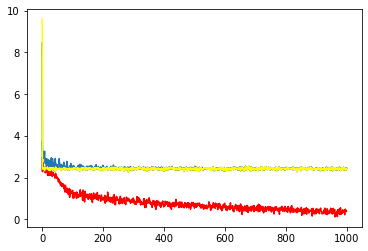

In [9]:
input_size = 8
output_size = 1
hidden_size = 200
    
batch_size = 50
epochs = 1000

#Learning for x**2
learning_rate = 10**-8/100

#Learning for sqrt()
#learning_rate = 2.5*10**-5
#learning_rate = 10**-6

    
Net1 = NN()
Net1.add_layer(input_size, hidden_size,activation=relu)
Net1.add_layer(hidden_size, hidden_size,activation=relu)
Net1.add_layer(hidden_size, output_size, activation=relu)
errors1 = np.zeros(epochs)

Net2 = NN()
Net2.add_layer(input_size, hidden_size,activation=relu)
Net2.add_layer(hidden_size, output_size, activation=relu)
errors2 = np.zeros(epochs)

Net3 = NN()
Net3.add_layer(input_size, hidden_size)#,activation=relu)
Net3.add_layer(hidden_size, hidden_size)#,activation=sigmoid)
Net3.add_layer(hidden_size, hidden_size)#,activation=relu)
Net3.add_layer(hidden_size, output_size, activation=relu)
errors3 = np.zeros(epochs)

Net4 = NN()
Net4.add_layer(input_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, hidden_size,activation=relu)
Net4.add_layer(hidden_size, output_size, activation=relu)
errors4 = np.zeros(epochs)

for i in range(epochs):
    # Generate inputs
    x,x_bit,y=prepare_complex_data(batch_size,lambda x:np.sqrt(x))
    # Forward
    y_hat_1 = Net1.forward(x_bit)
    y_hat_2 = Net2.forward(x_bit)
    y_hat_3 = Net3.forward(x_bit)
    y_hat_4 = Net4.forward(x_bit)
    #Error
    e1 = (y-y_hat_1)
    e2 = (y-y_hat_2)
    e3 = (y-y_hat_3)
    e4 = (y-y_hat_4)
    errors1[i] = np.sqrt(np.sum(e1**2)/batch_size)
    errors2[i] = np.sqrt(np.sum(e2**2)/batch_size)
    errors3[i] = np.sqrt(np.sum(e3**2)/batch_size)
    errors4[i] = np.sqrt(np.sum(e4**2)/batch_size)
    #backward
    Net1.backward(e1, y_hat_1)
    Net2.backward(e2, y_hat_2)
    Net3.backward(e3, y_hat_3)
    Net4.backward(e4, y_hat_4)
    Net1.update_weights(learning_rate*1000)
    Net2.update_weights(learning_rate*100000)
    Net3.update_weights(learning_rate*50)
    Net4.update_weights(learning_rate)

plt.plot(np.log(errors1))
plt.plot(np.log(errors2),color='red')
plt.plot(np.log(errors3),color='green')
plt.plot(np.log(errors4),color='yellow')
plt.show()

## TEST 3: Polynomial layers

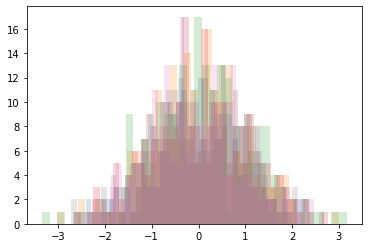

In [10]:
for i in range(8):
    plt.hist(Net4.layers[0].W[:,i],alpha=0.2,bins=40)

(array([1.000e+00, 1.000e+00, 1.000e+00, 4.000e+00, 0.000e+00, 6.000e+00,
        8.000e+00, 1.000e+01, 7.000e+00, 1.100e+01, 1.200e+01, 2.100e+01,
        2.800e+01, 2.800e+01, 3.300e+01, 4.400e+01, 4.200e+01, 6.300e+01,
        7.000e+01, 7.400e+01, 1.050e+02, 9.000e+01, 1.370e+02, 1.590e+02,
        1.860e+02, 2.100e+02, 2.540e+02, 2.870e+02, 3.450e+02, 3.770e+02,
        3.800e+02, 4.960e+02, 5.370e+02, 5.920e+02, 6.060e+02, 6.870e+02,
        7.530e+02, 8.180e+02, 8.630e+02, 9.870e+02, 1.006e+03, 1.029e+03,
        1.107e+03, 1.077e+03, 1.158e+03, 1.191e+03, 1.202e+03, 1.254e+03,
        1.250e+03, 1.259e+03, 1.203e+03, 1.263e+03, 1.169e+03, 1.219e+03,
        1.132e+03, 1.155e+03, 1.062e+03, 1.022e+03, 9.540e+02, 9.330e+02,
        9.240e+02, 8.050e+02, 7.150e+02, 7.440e+02, 6.170e+02, 5.800e+02,
        5.200e+02, 4.650e+02, 3.870e+02, 3.360e+02, 3.090e+02, 2.840e+02,
        2.150e+02, 2.100e+02, 1.900e+02, 1.560e+02, 1.280e+02, 1.100e+02,
        8.800e+01, 8.400e+01, 6.600e+0

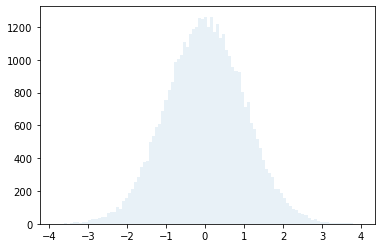

In [11]:
plt.hist(np.reshape(Net4.layers[1].W,-1),alpha=0.1,bins=100)

(array([  1.,   0.,   0.,   1.,   0.,   0.,   0.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   1.,   0.,   1.,   0.,   1.,   0.,   3.,   2.,
          1.,   4.,   1.,   3.,   4.,   4.,   9.,   1.,   3.,   5.,   5.,
          6.,   8.,  10.,   5.,  18.,  15.,  12.,  10.,  19.,  19.,  26.,
          9.,  34.,  30.,  36.,  39.,  32.,  55.,  57.,  58.,  66.,  69.,
         77.,  78.,  74., 110., 112., 108., 113., 125., 150., 177., 170.,
        173., 200., 225., 217., 228., 258., 279., 263., 308., 319., 328.,
        335., 384., 373., 394., 400., 431., 441., 443., 498., 509., 508.,
        572., 520., 591., 592., 576., 614., 595., 611., 640., 632., 608.,
        656., 634., 712., 684., 657., 692., 661., 685., 634., 649., 694.,
        620., 648., 557., 629., 624., 605., 624., 615., 558., 547., 582.,
        519., 516., 512., 474., 470., 413., 419., 439., 385., 385., 366.,
        353., 325., 336., 296., 320., 276., 268., 254., 219., 190., 185.,
        179., 183., 177., 174., 132., 

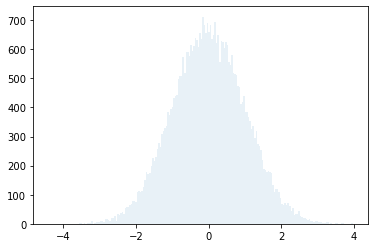

In [12]:
plt.hist(np.reshape(Net4.layers[2].W,-1),alpha=0.1,bins=200)

## Test 2

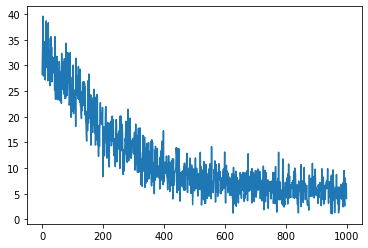

In [13]:
if run_training == True:
    input_size = 3
    output_size = 1
    hidden_size = 5
    
    batch_size = 25
    epochs = 1000
    learning_rate = 10**-3
    
    s = 2
    
    Net = NN()
    Net.add_layer(input_size, hidden_size)
    #Net.add_layer(hidden_size, hidden_size)
    Net.add_layer(hidden_size, output_size,activation=sigmoid)
    errors = np.zeros(epochs)
    
    for i in range(epochs):
        # Generate inputs
        x,y=prepare_data(input_size,batch_size,sigma=s)
        # Forward
        y_hat = Net.forward(x)
        #Error
        e = (y-y_hat)
        errors[i] = np.sum(e**2)
        #backward
        Net.backward(e, y_hat)
        Net.update_weights(learning_rate)
    plt.plot(errors)
    plt.show()